In [2]:
import cv2 as cv2
from matplotlib import pyplot as plt
import scipy.signal as sg 
import scipy.ndimage as sc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['image.cmap'] = 'gray'
from src.image_utils_package.image_utils import open_image

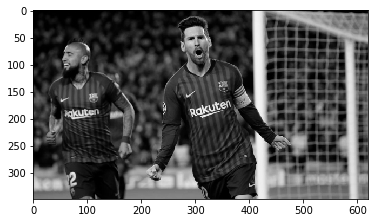

In [3]:
path = "../images/messi.jpg"
image_new = open_image(path, type="gray")
plt.imshow(image_new)

In [22]:
image_new.dtype

dtype('uint8')

In [4]:
img_height, img_width = image_new.shape

In [6]:
kernel = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [25]:
test_kernel = np.ones((3,3), dtype=np.uint8)

In [52]:
test_kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [37]:
k_size = test_kernel.shape[0]
k_mid = np.floor(k_size/2)
k_span = k_size - k_mid

In [53]:
int(k_mid)

1

In [26]:
def check_kernel(kernel):
    k_size = kernel.shape[0]
    k_mid = np.floor(k_size/2)
    if (k_size!=kernel.shape[1]):
        print("please enter a square matrix with an odd number size")
        return False
    else:
        if(k_size%2==0):
            print("please enter a square matrix with odd size")
            return False 
    return True

In [56]:
def kernel_convolution(image, kernel):
    if(check_kernel(kernel)==False):
        print("please enter a proper Kernel")
        return 0 
    else:
        #Some variables
        k_size = kernel.shape[0]
        k_mid = int(np.floor(k_size/2))
        k_span = int(k_size - k_mid)
        img_height, img_width = image.shape
        print("kspan is:", k_span)
        kernel_sum = (sum(map(sum, kernel)))
        normalized_kernel = kernel
        print("normalized dtype:", normalized_kernel.dtype)
#         temp_image = image
        
        result = np.zeros_like(image,dtype=np.uint8)
        for i in range(0+k_span ,img_height - k_span):
            for j in range(0 + k_span ,img_width - k_span):
#                 temp_image[i,j] = 1
                print("imagesize:", image[j-k_span :j+ k_span,i-k_span:i+k_span].shape)
                result[j-k_span:j+ k_span,i-k_span:i+k_span] = image[j-k_span:j+ k_span,i-k_span:i+k_span] @ normalized_kernel  
                result[j-k_span:j+ k_span,i-k_span:i+k_span]/ kernel_sum
        return result        

In [57]:
filtered = kernel_convolution(image_new, test_kernel)

kspan is: 1
normalized dtype: uint8
imagesize: (2, 2)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [20]:
for i,j in zip(range(10), range(15,25)):
    print(i,j)

0 15
1 16
2 17
3 18
4 19
5 20
6 21
7 22
8 23
9 24
